In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv("sales_data.csv",encoding='cp1252')

In [24]:
X = dataset.iloc[:, [1,2]]. values

In [25]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [26]:
wcss = []

In [27]:
from sklearn.cluster import KMeans

In [28]:
for i in range (1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [29]:
wcss

[1416353.729140348,
 494659.55828815623,
 363099.2501519978,
 245094.6610226741,
 198624.13337159078,
 164143.1715775774,
 142442.30806401666,
 120996.11582348016,
 105838.29998706961,
 94068.0283287643]

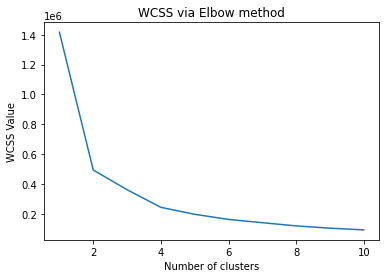

In [30]:
plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

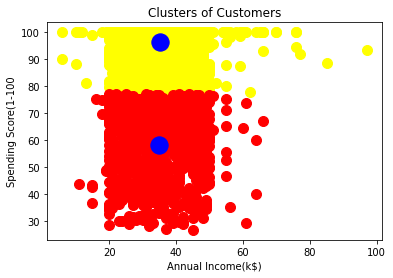

In [32]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'Yellow', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'Red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()